# Нахождение весов вручную

In [158]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [43]:
import numpy as np
X = np.array([[-0.7, 1.3, -1.2, 0.9,-0.5, -0.7],
            [-0.7, -0.3, -0.6, 0.6, -0.9, 1.4],
            [1.4, -1.1, 1.3, -1.4, 1.4, -0.7]])
X

array([[-0.7,  1.3, -1.2,  0.9, -0.5, -0.7],
       [-0.7, -0.3, -0.6,  0.6, -0.9,  1.4],
       [ 1.4, -1.1,  1.3, -1.4,  1.4, -0.7]])

In [31]:
lmbda = 0.1

In [41]:
X = np.hstack([np.ones((X.shape[0], 1)), X])
X

array([[ 1. , -0.7,  1.3, -1.2,  0.9, -0.5, -0.7],
       [ 1. , -0.7, -0.3, -0.6,  0.6, -0.9,  1.4],
       [ 1. ,  1.4, -1.1,  1.3, -1.4,  1.4, -0.7]])

In [62]:
y = np.array([37.9, 42.2, 47.3])
y

array([37.9, 42.2, 47.3])

In [45]:
X_T = X.T
X_T

array([[-0.7, -0.7,  1.4],
       [ 1.3, -0.3, -1.1],
       [-1.2, -0.6,  1.3],
       [ 0.9,  0.6, -1.4],
       [-0.5, -0.9,  1.4],
       [-0.7,  1.4, -0.7]])

In [49]:
I = np.eye(X.shape[1])
I[0, 0] = 0 

In [64]:
X_inv = np.linalg.inv(np.dot(X_T, X) + lmbda * I)
X_T_y = np.dot(X_T, y)
w = np.dot(X_inv, X_T_y)
w

array([ 123.42322446,  -31.26965068, -109.28708264,   20.87241528,
         -2.18889166,   11.49168123])

In [ ]:
# не регуляризируем свободный член, так как он не связан ни с каким признаком, потому его не стоит штрафовать

In [160]:
df = pd.read_csv('Real estate.csv')

In [162]:
df.head()
# смотрим на данные

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Подготовим и изучим данные

In [165]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [167]:
df.isnull().any()
# пропусков в данных нет

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

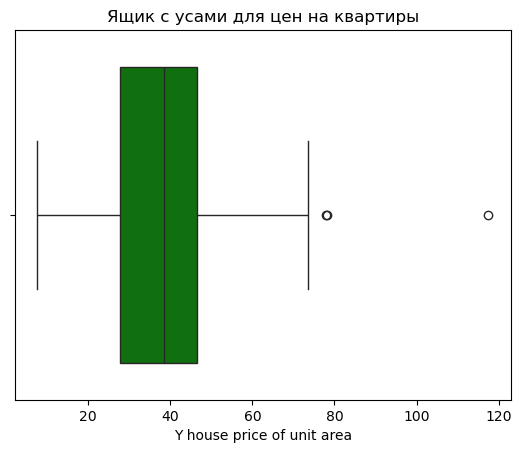

In [169]:
import seaborn as sns

sns.boxplot(x=df['Y house price of unit area'], color='green')
plt.title('Ящик с усами для цен на квартиры')
plt.show()

# Обработаем данные, чтобы избавиться от выбросов

In [172]:
# заметим: значения 120 и 80 - явный выброс, так как оно за пределами усов (плюс таких значений мало, модель на них не обучится)
# удалим все значения за границами усов
q1 = df['Y house price of unit area'].quantile(0.25)
q3 = df['Y house price of unit area'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# чистим выборсы 
df = df[(df['Y house price of unit area'] >= lower_limit) & (df['Y house price of unit area'] <= upper_limit)]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],
    df.iloc[:, -1],
    test_size = 0.25,
    random_state = 12
)
# разбиение выборки на обучающую и тестовую

In [177]:
# создание модели 
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
# обучение модели
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [179]:
# предсказаия модели
y_pred = regressor.predict(X_test)

In [187]:
# оценка модели
print(f"MSE = {mean_squared_error(y_pred, y_test)}")
print(f"R2 score = {r2_score(y_pred, y_test)}") 
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

MSE = 43.668353966960744
R2 score = 0.6585096474253748
MAE = 5.06471079154118


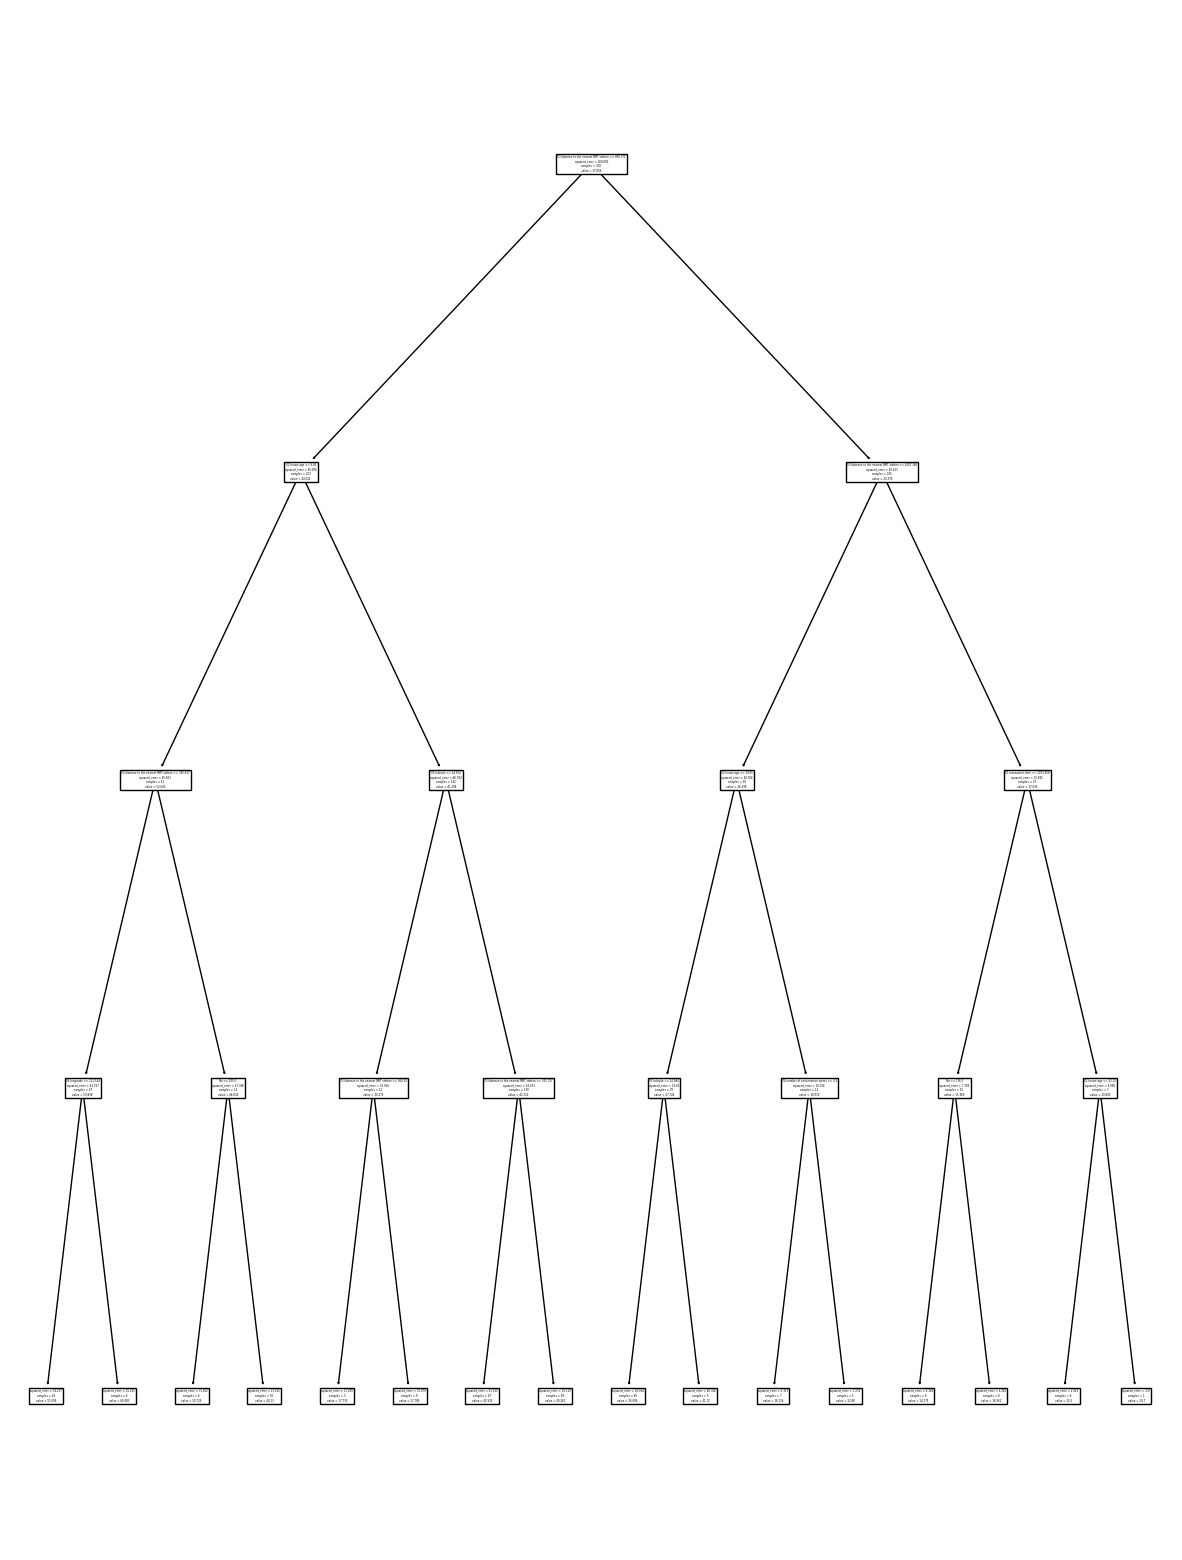

In [183]:
# визуализация дерева
from sklearn import tree
# tree.plot_tree(regressor)
plt.figure(figsize=(15,20))
tree.plot_tree(regressor, feature_names = df.columns[:-1].tolist(), max_depth=4)
plt.show()

# Реализация классической линейной регрессии

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
clmns = df.columns.tolist()
target, ocean = clmns.index('median_house_value'), clmns.index('ocean_proximity')
clmns[target], clmns[ocean] = clmns[ocean], clmns[target]
df = df[clmns]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [54]:
weight_for_df = {'NEAR BAY': 3, '<1H OCEAN':2, 'INLAND':1, 'NEAR OCEAN':4, 'ISLAND':5}
df['ocean_proximity'] = df['ocean_proximity'].map(weight_for_df)

In [56]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


In [48]:
# заполним медианой строки с NaN
df.fillna(df.median(), inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


In [140]:
# масштибаруем данные
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [142]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.976419,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.976419,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0.976419,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.976419,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.976419,1.172900
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.083192,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.083192,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-1.083192,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.083192,-1.058608


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=18)

In [146]:
lnreg_model = LinearRegression()
lnreg_model.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = lnreg_model.predict(X_test)

In [150]:
pd.DataFrame({"Предсказанные значения": y_pred,"Реальные значения": y_test})

,Предсказанные значения,Реальные значения
17966,0.845326,0.710999
5410,1.038687,1.552473
19414,-0.193360,-0.441586
15525,-0.444835,-0.611440
12830,-1.018967,-0.958949
...,...,...
2908,-0.340016,-1.075941
6244,-0.192943,-0.483183
10783,0.121367,1.033376
8417,-0.038633,-0.472783


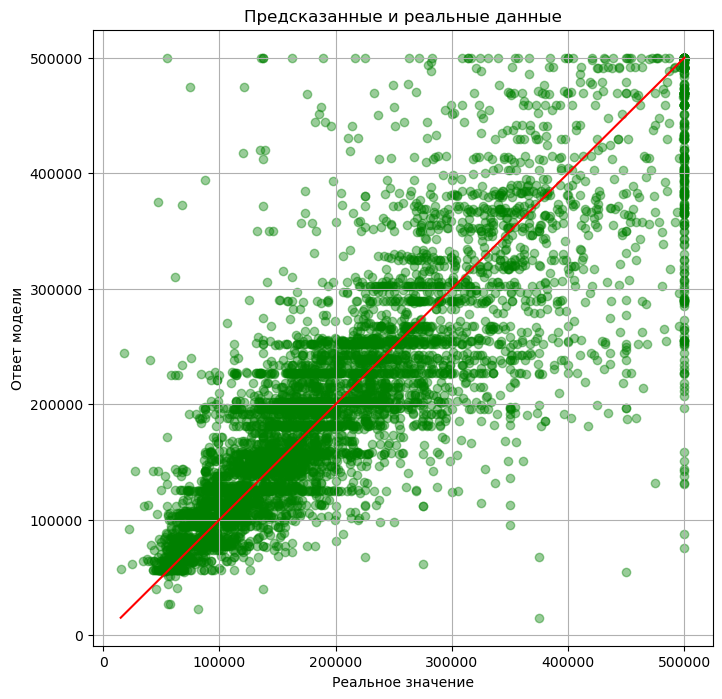

In [215]:
# визуализируем предсказания модели - чем ближе точки лежат к проводимой линии, тем точнее предсказание
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Реальное значение")
plt.ylabel("Ответ модели")
plt.title("Предсказанные и реальные данные")
plt.grid()
plt.show()

In [217]:
# метрики
print(f"RMSE = {root_mean_squared_error(y_test, y_pred)}")
print(f"R2 = {r2_score(y_test, y_pred)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

RMSE = 64135.761840830775
R2 = 0.6968991712413801
MAE = 41587.66127270852


In [156]:
# выведем коэффициенты модели
lnreg_model.coef_

array([-0.62352847, -0.66267376,  0.11824866, -0.11611552,  0.2526769 ,
       -0.35396082,  0.25857553,  0.64885091,  0.07642593])

## Решающие деревья с ныненшим датасетом

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
clmns = df.columns.tolist()
target, ocean = clmns.index('median_house_value'), clmns.index('ocean_proximity')
clmns[target], clmns[ocean] = clmns[ocean], clmns[target]
df = df[clmns]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [62]:
weight_for_df = {'NEAR BAY': 3, '<1H OCEAN':2, 'INLAND':1, 'NEAR OCEAN':4, 'ISLAND':5}
df['ocean_proximity'] = df['ocean_proximity'].map(weight_for_df)

In [64]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


In [66]:
df = df.dropna(subset=['total_bedrooms'])
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [68]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


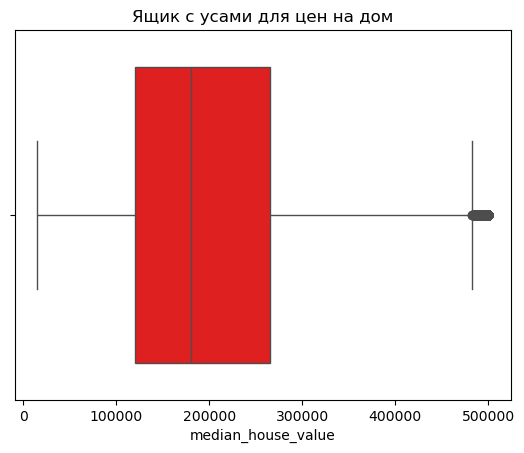

In [70]:
import seaborn as sns

sns.boxplot(x=df['median_house_value'], color='red')
plt.title('Ящик с усами для цен на дом')
plt.show()

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],
    df.iloc[:, -1],
    test_size = 0.3,
    random_state = 12
)
# разбиение выборки на обучающую и тестовую

In [203]:
# создание модели 
regressor = DecisionTreeRegressor(max_depth=11, random_state=42)
# обучение модели
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [205]:
# предсказаия модели
y_pred = regressor.predict(X_test)

pd.DataFrame({"Предсказанные моделью значения":y_pred, "Реальные значения": y_test})

,Предсказанные моделью значения,Реальные значения
20498,302293.966851,229800.0
3472,499124.490196,431800.0
15598,83350.000000,110700.0
19685,91561.333333,65200.0
3651,199589.887640,168600.0
...,...,...
3854,199589.887640,210000.0
15933,219720.000000,233000.0
18931,131502.439024,122500.0
20638,85342.105263,84700.0


In [207]:
# оценка модели
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R2 score = {r2_score(y_test, y_pred)}") 
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

MSE = 4113395946.9037647
R2 score = 0.6968991712413801
MAE = 41587.66127270852


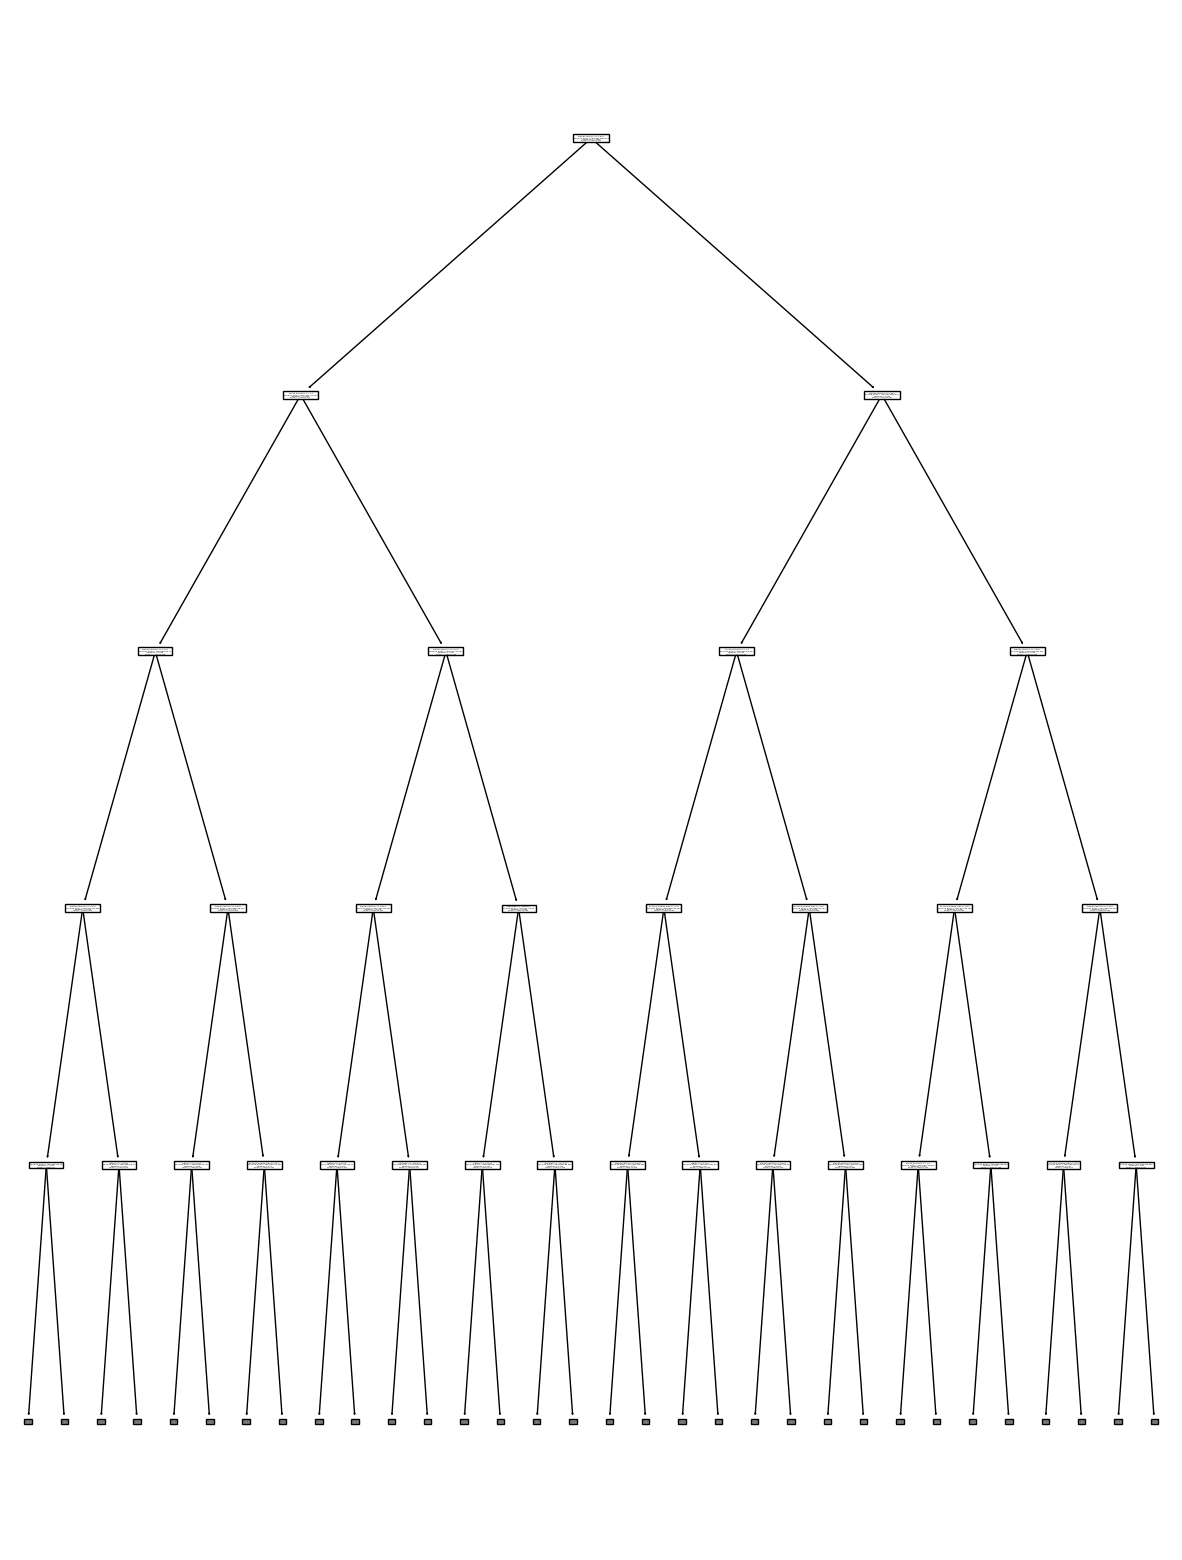

In [211]:
# визуализация дерева
from sklearn import tree
# tree.plot_tree(regressor)
plt.figure(figsize=(15,20))
tree.plot_tree(regressor, feature_names = df.columns[:-1].tolist(), max_depth=4)
plt.show()